In [1]:
import time
import gc
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys
import os
sys.path.append(os.getcwd())
from visualizer.main import Visualizer as vis
# Importujemy bezpośrednio z pliku quadtree.py
from algorithms.quadtree.quadtree import QuadTree, Rectangle, Point, build_quadtree
from algorithms.quadtree.quadtree_visualization import quadtree_vis
from algorithms.quadtree.quadtree_query_visualization import visualize_quadtree_query

from algorithms.utils.build_tree import build_tree, get_points_in_area
from algorithms.utils.visualize_search_result import visualize_search_result

from points_generators import *

from algorithms.kd_tree.kd_class import *
from algorithms.kd_tree.kd_build_visualization import *
from algorithms.kd_tree.kd_query_visualization import * 

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import random

In [2]:
def points_visualization(points):
    vis = Visualizer()
    for pkt in points:
        vis.add_point(pkt, color = 'blue')
    return vis

## Wprowadzenie

Notatnik ten ma służyć jako narzędzie pozwalające na porównanie działania strktur KDTree oraz quadtree w zapytaniach, polegających na szukaniu punktów zawartych w obrębie prostokata

# Wizualizacja budowy oraz działania algorytmów #

Poniżej pokżemy wizualizacje przedstawiającą budowę oraz wizualizację zapytania dla 100 punktów wylosowanych jednostajnie z przedziału [0, 800] x [0, 800]

In [6]:
points = [(random.uniform(0, 800), random.uniform(0, 800)) for _ in range(100)]

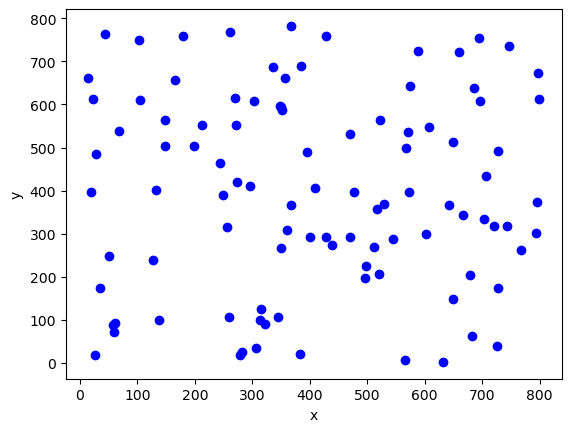

In [7]:
points_visualization(points).show()

## quadtree ##

budowa quadtree wizualizacja

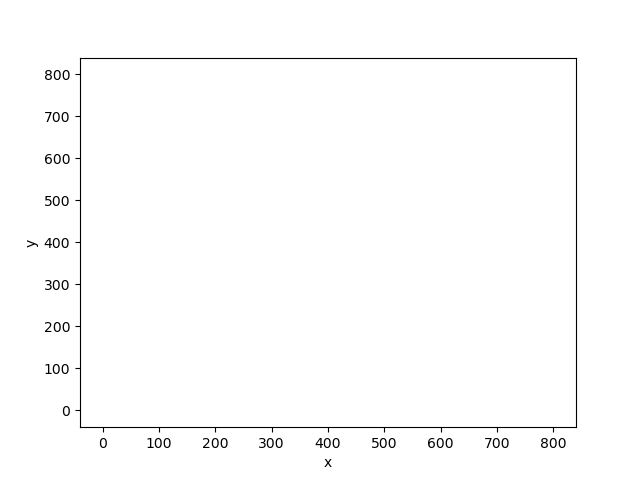

In [10]:
screen_boundary = Rectangle(400, 400, 400, 400)
k = 4
vis= quadtree_vis(points, screen_boundary, k)
vis.show_gif(interval=200)

działanie zapytania quadtree

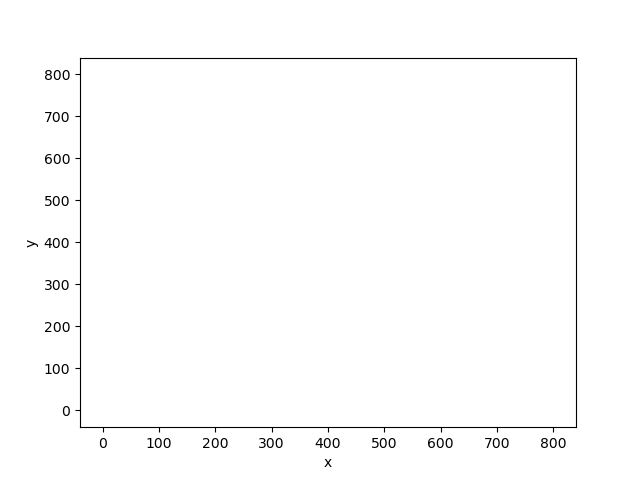

In [15]:

search_area = Rectangle(400, 350, 200, 150)
vis_query = visualize_quadtree_query(points, search_area, screen_boundary, 4)
vis_query.show_gif(interval=200) 

## kd-tree ##

wizualizacja budowy kd-tree

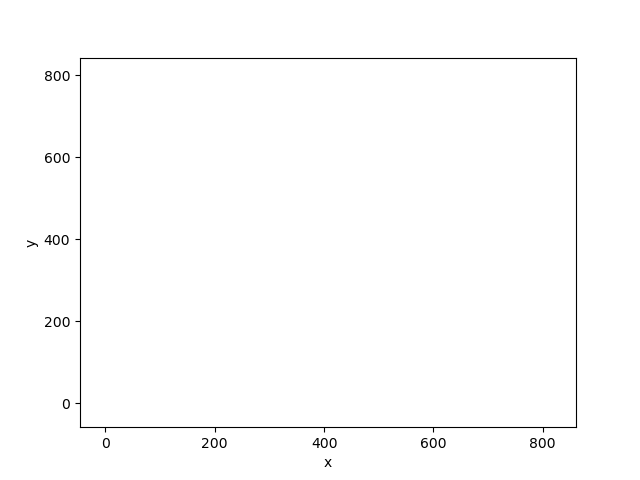

In [12]:
vis_kd = kd_build_visualization2(points)
vis_kd.show_gif()

działanie kd-tree wizualizacja

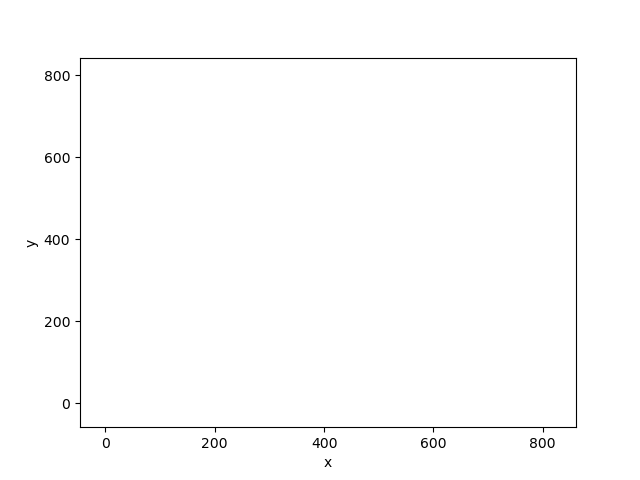

In [14]:
tree = KDTree(points)
query_box = (200, 600, 200, 500) # x_min, x_max, y_min, y_max
vis_kd2 = visualize_kdtree_query2(tree, points, query_box)
vis_kd2.show_gif(interval=150)

In [ ]:
search_area = Rectangle(300, 300, 100, 100)

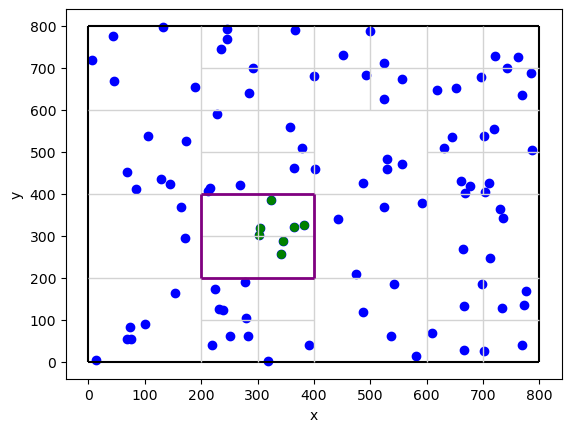

In [ ]:
found_points = get_points_in_area("quadtree", points, search_area, 4)
vis4 = visualize_search_result(points, search_area, found_points, "quadtree")
vis4.show()

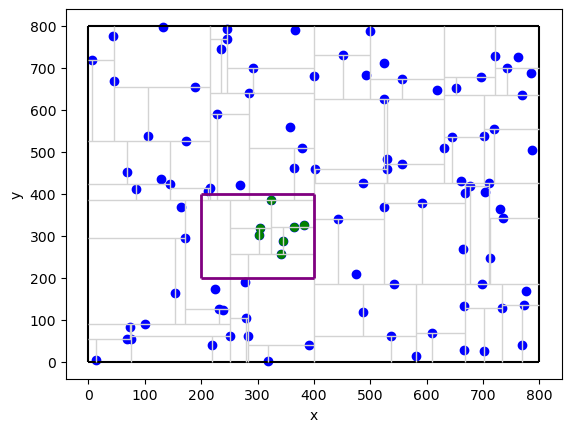

In [ ]:
found_points = get_points_in_area("kdtree", points, search_area, 4)
vis5 = visualize_search_result(points, search_area, found_points, "kdtree")
vis5.show()

## Wizualizacja wyników algorytmów na przykładowych zbiorach danych

Poniżej przedstawimy wizualizacje zapytań na przykładzie zbiorów testowych, dla których będziemy potem porównywać czasy działania algorytmów

# Punkty losowane zgodnie z rozkładem jednostajnym

UNIFORM
Search rect: (200, 600, 250, 550)
Found QT: 95  sample: [(np.float64(414.37327400885647), np.float64(458.45546118352604)), (np.float64(546.6755376308694), np.float64(404.2876742965081)), (np.float64(378.8589651822267), np.float64(265.8570248646386)), (np.float64(283.95414129977314), np.float64(362.4222271286931)), (np.float64(387.8255484080706), np.float64(388.28520146903014)), (np.float64(303.4253618158527), np.float64(332.539668477585)), (np.float64(326.52804895475924), np.float64(371.0682339536185)), (np.float64(202.43431484277562), np.float64(354.33898569029515)), (np.float64(283.72249135067545), np.float64(253.5103197987392)), (np.float64(256.85225539346146), np.float64(288.05336175524775)), (np.float64(263.1841619748321), np.float64(281.95790145665273)), (np.float64(374.3869587088055), np.float64(253.16348391315896)), (np.float64(331.06548042121926), np.float64(293.66551543886493)), (np.float64(355.3127766209831), np.float64(279.4383318702883)), (np.float64(386.1291328161

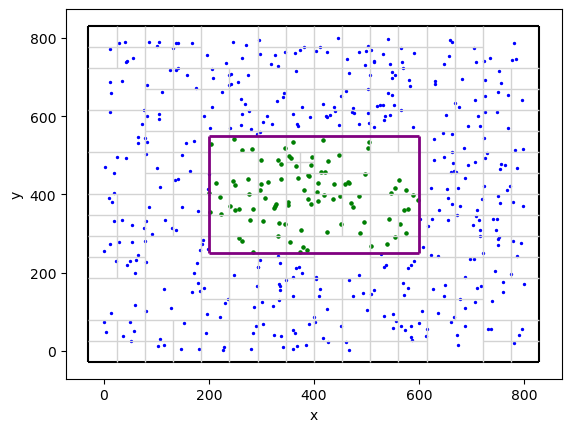

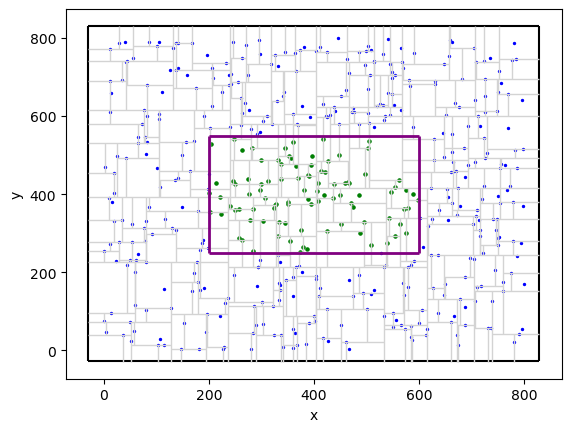

In [2]:
points = generate_uniform_points(0, 800, 500)
search_area = Rectangle(400, 400, 200, 150)

print("UNIFORM")

# QuadTree
qt = QuadTree(Rectangle(400, 400, 400, 400), capacity=4)
for x, y in points:
    qt.insert(Point(x, y))

found_qt = []
qt.query(search_area, found_qt)

# KDTree
kd = KDTree(points)
q_rect = (search_area.x - search_area.w, search_area.x + search_area.w,
          search_area.y - search_area.h, search_area.y + search_area.h)
found_kd = kd.query(q_rect)

qt_as_xy = {(p.x, p.y) for p in found_qt}
kd_as_xy = set(found_kd)

print("Search rect:", q_rect)
print("Found QT:", len(found_qt), " sample:", [(p.x, p.y) for p in found_qt[:20]])
print("Found KD:", len(found_kd), " sample:", found_kd[:20])
print("Sets equal:", qt_as_xy == kd_as_xy)

vis_qt = visualize_search_result(points, search_area, found_qt, algorithm="quadtree")
vis_qt.show()
vis_kd = visualize_search_result(points, search_area, found_kd, algorithm="kdtree")
vis_kd.show()




# Działanie na punktach wylosowanych zgodnie z rozkładem normalnym z przedziału [0, 800] x [0, 800]

NORMAL / GAUSS
Search rect: (320, 480, 320, 480)
Found QT: 240  sample: [(np.float64(386.0393156522059), np.float64(369.80706676260775)), (np.float64(367.3330603458402), np.float64(336.5887488715786)), (np.float64(325.9717421456851), np.float64(349.4632791491528)), (np.float64(326.8602156208125), np.float64(369.2106150642359)), (np.float64(385.73294471021273), np.float64(349.0035426490098)), (np.float64(353.35013797799127), np.float64(336.96094556269907)), (np.float64(349.46076953202754), np.float64(367.28118810786975)), (np.float64(385.1783022749567), np.float64(395.3738050216312)), (np.float64(380.82305572897263), np.float64(334.1112847222664)), (np.float64(356.4252701610323), np.float64(384.8785958682081)), (np.float64(332.5217139631184), np.float64(345.368996183237)), (np.float64(327.9797233805519), np.float64(326.35845295158936)), (np.float64(324.4266367098438), np.float64(331.0198723623437)), (np.float64(341.5741031009255), np.float64(333.67845843359703)), (np.float64(329.4037690

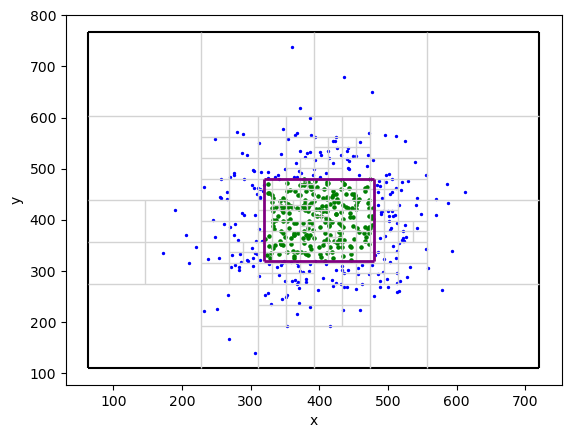

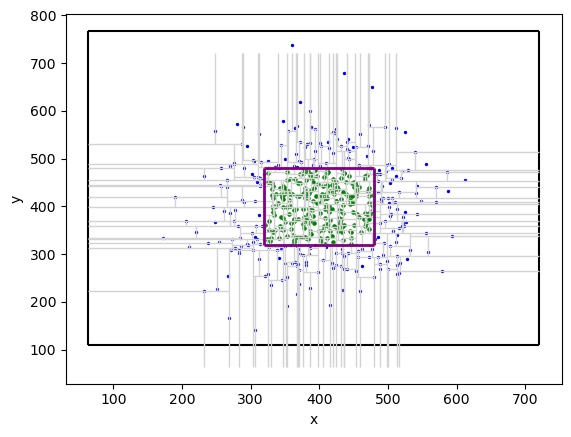

In [3]:
points = generate_normal_points(mean=400, std=80, n=500)
search_area = Rectangle(400, 400, 80, 80)

print("NORMAL / GAUSS")

# QuadTree
qt = QuadTree(Rectangle(400, 400, 400, 400), capacity=4)
for x, y in points:
    qt.insert(Point(x, y))

found_qt = []
qt.query(search_area, found_qt)

# KDTree
kd = KDTree(points)
q_rect = (search_area.x - search_area.w, search_area.x + search_area.w,
          search_area.y - search_area.h, search_area.y + search_area.h)
found_kd = kd.query(q_rect)

qt_as_xy = {(p.x, p.y) for p in found_qt}
kd_as_xy = set(found_kd)

print("Search rect:", q_rect)
print("Found QT:", len(found_qt), " sample:", [(p.x, p.y) for p in found_qt[:20]])
print("Found KD:", len(found_kd), " sample:", found_kd[:20])
print("Sets equal:", qt_as_xy == kd_as_xy)

vis_qt = visualize_search_result(points, search_area, found_qt, algorithm="quadtree")
vis_qt.show()
vis_kd = visualize_search_result(points, search_area, found_kd, algorithm="kdtree")
vis_kd.show()


CLUSTERS
Search rect: (120, 280, 520, 680)
Found QT: 121  sample: [(np.float64(247.15176209995371), np.float64(551.0999037957624)), (np.float64(203.7444830371361), np.float64(577.4101238218881)), (np.float64(180.64217921374717), np.float64(656.9764153023308)), (np.float64(223.94487913065387), np.float64(636.6669372380312)), (np.float64(189.43282892692798), np.float64(582.9722714426293)), (np.float64(181.1750000128328), np.float64(582.0565767697232)), (np.float64(195.53316215316084), np.float64(559.0097377779764)), (np.float64(176.27038852991856), np.float64(550.5430506604325)), (np.float64(156.00124400398062), np.float64(599.6758031725218)), (np.float64(173.51954786850453), np.float64(596.7348857892715)), (np.float64(184.76834136579095), np.float64(576.8389670345041)), (np.float64(154.2495630524347), np.float64(573.993099049071)), (np.float64(127.0778870414921), np.float64(578.2702038034536)), (np.float64(146.17939839764028), np.float64(561.3117263646374)), (np.float64(122.241103314537

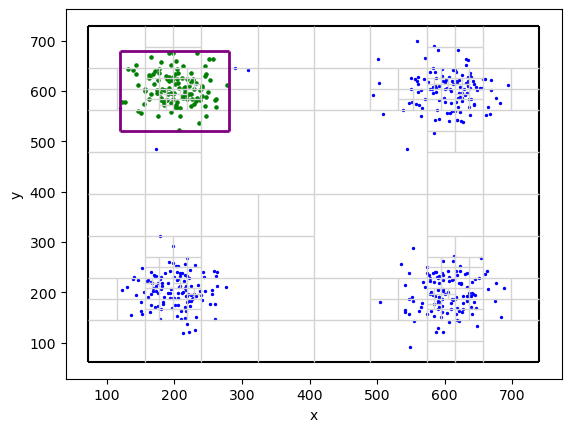

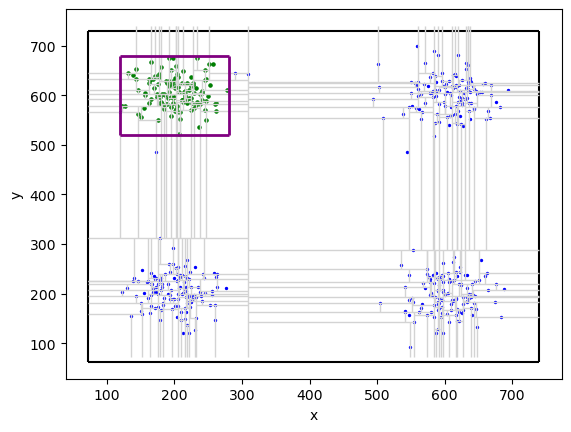

In [4]:
points = generate_clustered_points(
    cluster_centers=[(200, 200), (200, 600), (600, 200), (600, 600)],
    cluster_std=35,
    points_per_cluster=125
)
search_area = Rectangle(200, 600, 80, 80)  # celuję w klaster (200,600)

print("CLUSTERS")

# QuadTree
qt = QuadTree(Rectangle(400, 400, 400, 400), capacity=4)
for x, y in points:
    qt.insert(Point(x, y))

found_qt = []
qt.query(search_area, found_qt)

# KDTree
kd = KDTree(points)
q_rect = (search_area.x - search_area.w, search_area.x + search_area.w,
          search_area.y - search_area.h, search_area.y + search_area.h)
found_kd = kd.query(q_rect)

qt_as_xy = {(p.x, p.y) for p in found_qt}
kd_as_xy = set(found_kd)

print("Search rect:", q_rect)
print("Found QT:", len(found_qt), " sample:", [(p.x, p.y) for p in found_qt[:20]])
print("Found KD:", len(found_kd), " sample:", found_kd[:20])
print("Sets equal:", qt_as_xy == kd_as_xy)

vis_qt = visualize_search_result(points, search_area, found_qt, algorithm="quadtree")
vis_qt.show()
vis_kd = visualize_search_result(points, search_area, found_kd, algorithm="kdtree")
vis_kd.show()


COLLINEAR / DIAGONAL
Search rect: (300, 500, 300, 500)
Found QT: 58  sample: [(np.float64(310.41410077060425), np.float64(310.41410077060425)), (np.float64(396.5299532630022), np.float64(396.5299532630022)), (np.float64(387.7369773230038), np.float64(387.7369773230038)), (np.float64(315.6398391219781), np.float64(315.6398391219781)), (np.float64(300.20047658397874), np.float64(300.20047658397874)), (np.float64(307.42057478259335), np.float64(307.42057478259335)), (np.float64(343.0973285250946), np.float64(343.0973285250946)), (np.float64(320.84453456821365), np.float64(320.84453456821365)), (np.float64(305.236364537426), np.float64(305.236364537426)), (np.float64(320.6576427104901), np.float64(320.6576427104901)), (np.float64(313.36535552169096), np.float64(313.36535552169096)), (np.float64(311.898046078905), np.float64(311.898046078905)), (np.float64(346.917118014286), np.float64(346.917118014286)), (np.float64(360.52529268746554), np.float64(360.52529268746554)), (np.float64(354.6588

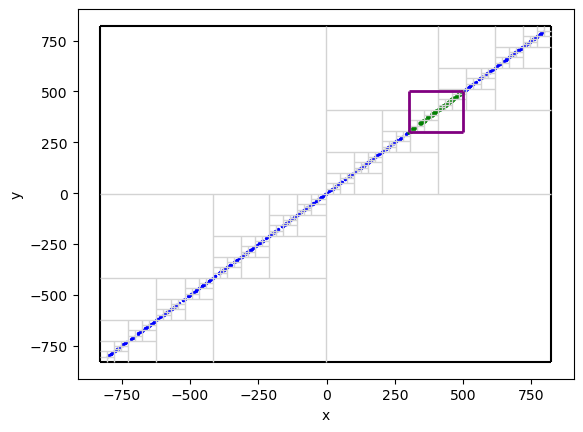

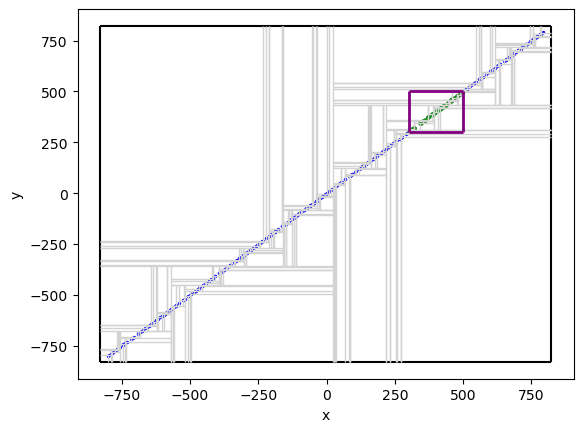

In [5]:
points = generate_collinear_points(a=(0,0), b=(800,800), n=500, x_range=800)  
search_area = Rectangle(400, 400, 100, 100)  # mały kwadrat przecinający prostą

print("COLLINEAR / DIAGONAL")

# QuadTree
qt = QuadTree(Rectangle(400, 400, 400, 400), capacity=4)
for x, y in points:
    qt.insert(Point(x, y))

found_qt = []
qt.query(search_area, found_qt)

# KDTree
kd = KDTree(points)
q_rect = (search_area.x - search_area.w, search_area.x + search_area.w,
          search_area.y - search_area.h, search_area.y + search_area.h)
found_kd = kd.query(q_rect)

qt_as_xy = {(p.x, p.y) for p in found_qt}
kd_as_xy = set(found_kd)

print("Search rect:", q_rect)
print("Found QT:", len(found_qt), " sample:", [(p.x, p.y) for p in found_qt[:20]])
print("Found KD:", len(found_kd), " sample:", found_kd[:20])
print("Sets equal:", qt_as_xy == kd_as_xy)

vis_qt = visualize_search_result(points, search_area, found_qt, algorithm="quadtree")
vis_qt.show()
vis_kd = visualize_search_result(points, search_area, found_kd, algorithm="kdtree")
vis_kd.show()


SQUARE + DIAGONALS
Search rect: (280, 520, 280, 520)
Found QT: 53  sample: [(np.float64(393.3727751816794), np.float64(393.3727751816794)), (np.float64(297.40967209230087), np.float64(297.40967209230087)), (np.float64(285.7345321805343), np.float64(285.7345321805343)), (np.float64(293.42776548722424), np.float64(293.42776548722424)), (np.float64(345.6295281645549), np.float64(345.6295281645549)), (np.float64(329.1237856979082), np.float64(329.1237856979082)), (np.float64(375.2477729644173), np.float64(375.2477729644173)), (np.float64(311.60301075706025), np.float64(311.60301075706025)), (np.float64(311.51869069721823), np.float64(311.51869069721823)), (np.float64(318.52034038503695), np.float64(318.52034038503695)), (np.float64(312.4049181440693), np.float64(312.4049181440693)), (np.float64(309.28575704300727), np.float64(309.28575704300727)), (np.float64(307.09013743330695), np.float64(307.09013743330695)), (np.float64(371.2481787158915), np.float64(371.2481787158915)), (np.float64(36

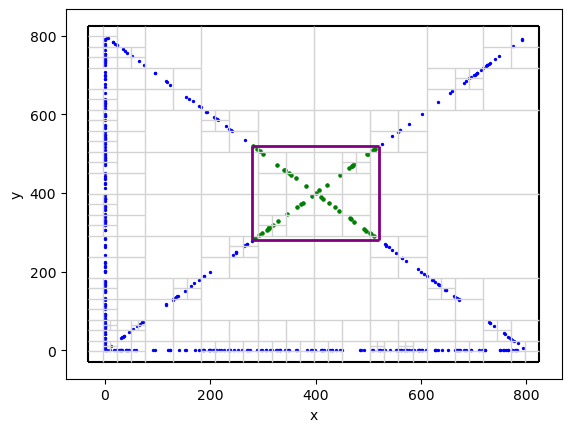

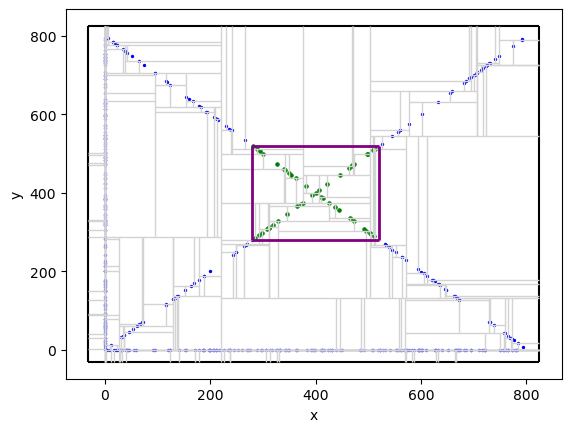

In [6]:
points = generate_square_points(
    a=(0, 0), b=(800, 0), c=(800, 800), d=(0, 800),
    axis_n=150, diag_n=100
)
search_area = Rectangle(400, 400, 120, 120)  # okolice przecięcia przekątnych

print("SQUARE + DIAGONALS")

# QuadTree
qt = QuadTree(Rectangle(400, 400, 400, 400), capacity=4)
for x, y in points:
    qt.insert(Point(x, y))

found_qt = []
qt.query(search_area, found_qt)

# KDTree
kd = KDTree(points)
q_rect = (search_area.x - search_area.w, search_area.x + search_area.w,
          search_area.y - search_area.h, search_area.y + search_area.h)
found_kd = kd.query(q_rect)

qt_as_xy = {(p.x, p.y) for p in found_qt}
kd_as_xy = set(found_kd)

print("Search rect:", q_rect)
print("Found QT:", len(found_qt), " sample:", [(p.x, p.y) for p in found_qt[:20]])
print("Found KD:", len(found_kd), " sample:", found_kd[:20])
print("Sets equal:", qt_as_xy == kd_as_xy)

vis_qt = visualize_search_result(points, search_area, found_qt, algorithm="quadtree")
vis_qt.show()
vis_kd = visualize_search_result(points, search_area, found_kd, algorithm="kdtree")
vis_kd.show()


GRID
Search rect: (80, 320, 80, 320)
Found QT: 36  sample: [(114.28571428571428, 114.28571428571428), (114.28571428571428, 152.38095238095238), (114.28571428571428, 190.47619047619048), (152.38095238095238, 114.28571428571428), (190.47619047619048, 114.28571428571428), (152.38095238095238, 152.38095238095238), (152.38095238095238, 190.47619047619048), (190.47619047619048, 152.38095238095238), (190.47619047619048, 190.47619047619048), (228.57142857142856, 114.28571428571428), (228.57142857142856, 152.38095238095238), (228.57142857142856, 190.47619047619048), (266.6666666666667, 114.28571428571428), (266.6666666666667, 152.38095238095238), (266.6666666666667, 190.47619047619048), (304.76190476190476, 114.28571428571428), (304.76190476190476, 152.38095238095238), (304.76190476190476, 190.47619047619048), (114.28571428571428, 228.57142857142856), (114.28571428571428, 266.6666666666667)]
Found KD: 36  sample: [(114.28571428571428, 114.28571428571428), (152.38095238095238, 114.28571428571428

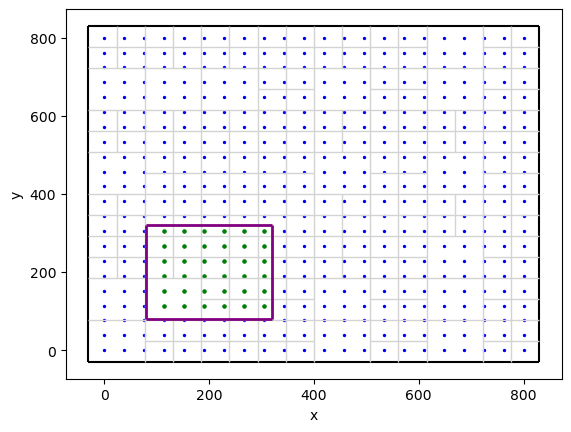

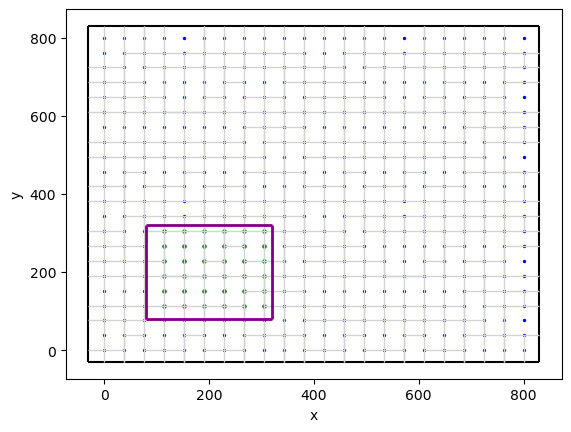

In [7]:
points = generate_grid_points(n=22)
scale = 800 / 21
points = [(i*scale, j*scale) for (i, j) in points]

search_area = Rectangle(200, 200, 120, 120)

print("GRID")

# QuadTree
qt = QuadTree(Rectangle(400, 400, 400, 400), capacity=4)
for x, y in points:
    qt.insert(Point(x, y))

found_qt = []
qt.query(search_area, found_qt)

# KDTree
kd = KDTree(points)
q_rect = (search_area.x - search_area.w, search_area.x + search_area.w,
          search_area.y - search_area.h, search_area.y + search_area.h)
found_kd = kd.query(q_rect)

qt_as_xy = {(p.x, p.y) for p in found_qt}
kd_as_xy = set(found_kd)

print("Search rect:", q_rect)
print("Found QT:", len(found_qt), " sample:", [(p.x, p.y) for p in found_qt[:20]])
print("Found KD:", len(found_kd), " sample:", found_kd[:20])
print("Sets equal:", qt_as_xy == kd_as_xy)

vis_qt = visualize_search_result(points, search_area, found_qt, algorithm="quadtree")
vis_qt.show()
vis_kd = visualize_search_result(points, search_area, found_kd, algorithm="kdtree")
vis_kd.show()


SPIRAL
Search rect: (470, 630, 280, 520)
Found QT: 55  sample: [(np.float64(521.3956303698992), np.float64(291.29310647494225)), (np.float64(526.6118612461377), np.float64(297.62562520208303)), (np.float64(470.97010849206185), np.float64(352.2960126385242)), (np.float64(471.7761165111684), np.float64(361.6167085405055)), (np.float64(476.0409278578618), np.float64(368.71293939772966)), (np.float64(477.57930142225416), np.float64(372.55978844173103)), (np.float64(478.20172420985836), np.float64(376.6971793807885)), (np.float64(478.9086103221006), np.float64(380.75333528454587)), (np.float64(486.79455195430387), np.float64(383.4090718421756)), (np.float64(486.3858809399299), np.float64(387.9578377919618)), (np.float64(479.495087828295), np.float64(392.9750319980023)), (np.float64(481.8801699022331), np.float64(396.9055323279547)), (np.float64(535.7829466088097), np.float64(301.08645367357536)), (np.float64(539.6567431169474), np.float64(308.65862035869486)), (np.float64(549.0480515211217)

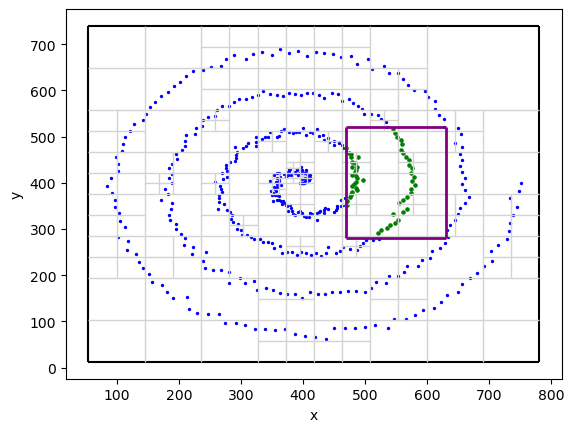

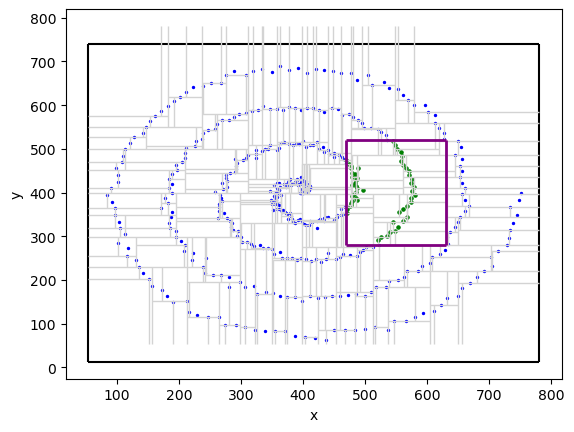

In [8]:
points = generate_spiral_points(n=500, center=(400, 400), max_radius=350, turns=4)
search_area = Rectangle(550, 400, 80, 120)  # pasek po prawej od środka

print("SPIRAL")

# QuadTree
qt = QuadTree(Rectangle(400, 400, 400, 400), capacity=4)
for x, y in points:
    qt.insert(Point(x, y))

found_qt = []
qt.query(search_area, found_qt)

# KDTree
kd = KDTree(points)
q_rect = (search_area.x - search_area.w, search_area.x + search_area.w,
          search_area.y - search_area.h, search_area.y + search_area.h)
found_kd = kd.query(q_rect)

qt_as_xy = {(p.x, p.y) for p in found_qt}
kd_as_xy = set(found_kd)

print("Search rect:", q_rect)
print("Found QT:", len(found_qt), " sample:", [(p.x, p.y) for p in found_qt[:20]])
print("Found KD:", len(found_kd), " sample:", found_kd[:20])
print("Sets equal:", qt_as_xy == kd_as_xy)

vis_qt = visualize_search_result(points, search_area, found_qt, algorithm="quadtree")
vis_qt.show()
vis_kd = visualize_search_result(points, search_area, found_kd, algorithm="kdtree")
vis_kd.show()


## Porównanie działania algorytmów ##

Chcemy teraz porównać działanie obydwu algorytmów na wybranych zbiorach testowych

In [ ]:
import time
import gc
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1. KONFIGURACJA TESTÓW
# ==========================================

# Testujemy do 200 tys. punktów (zgodnie z prośbą)
N_VALUES = [1000, 5000, 10000, 25000, 50000, 100000, 200000]
REPEATS = 5  # Powtórzenia pomiaru dla uśrednienia (szum procesora)

# ------------------------------------------
# GENERATORY DANYCH
# ------------------------------------------

def get_uniform(n): 
    return [tuple(p) for p in np.random.uniform(0, 1000, size=(n, 2))]

def get_normal(n): 
    return [tuple(p) for p in np.random.normal(500, 50, size=(n, 2))]

def get_clusters(n):
    centers = [(200, 200), (800, 800), (200, 800), (800, 200)]
    data = []
    for c in centers:
        data.extend(np.random.normal(c, 30, size=(n // 4, 2)))
    return [tuple(p) for p in data]

def get_diagonal(n):
    # Punkty wzdłuż przekątnej (0,0)->(1000,1000) z lekkim szumem
    t = np.random.uniform(0, 1000, n)
    noise = np.random.normal(0, 2, n)
    return [(t[i] + noise[i], t[i] - noise[i]) for i in range(n)]

def get_grid(n):
    # Regularna siatka
    side = int(np.sqrt(n))
    pts = [(i, j) for i in range(side) for j in range(side)]
    scale = 1000 / max(side, 1)
    return [(p[0]*scale, p[1]*scale) for p in pts]

def get_spiral(n):
    center = (500, 500); max_radius = 450; turns = 5
    theta = np.linspace(0, turns * 2 * np.pi, n)
    r = (theta / (turns*2*np.pi)) * max_radius + np.random.normal(0, 5, n)
    x = center[0] + r * np.cos(theta); y = center[1] + r * np.sin(theta)
    return [tuple(p) for p in np.column_stack((x, y))]

def get_square(n):
    # Punkty na obwodzie kwadratu i jego przekątnych (koperta)
    pts = []
    t = np.random.uniform(0, 1000, n // 2) # Boki
    for val in t:
        if random.random() < 0.5: pts.append((val, 0))
        else: pts.append((val, 1000))
    t = np.random.uniform(0, 1000, n // 2) # Przekątne
    for val in t:
        if random.random() < 0.5: pts.append((val, val))
        else: pts.append((val, 1000 - val))
    return pts

# ------------------------------------------
# SCENARIUSZE (Zbiór + Stałe Zapytanie)
# ------------------------------------------
TEST_CASES = [
    {"name": "Uniform", "gen": get_uniform, "query": (400, 600, 400, 600)},
    {"name": "Normal (Gauss)", "gen": get_normal, "query": (480, 520, 480, 520)},
    {"name": "Clusters", "gen": get_clusters, "query": (180, 220, 180, 220)},
    {"name": "Diagonal", "gen": get_diagonal, "query": (450, 550, 450, 550)},
    {"name": "Grid", "gen": get_grid, "query": (100, 300, 100, 300)},
    {"name": "Spiral", "gen": get_spiral, "query": (550, 750, 450, 650)},
    {"name": "Square + Diags", "gen": get_square, "query": (400, 600, 400, 600)}
]

# ==========================================
# 2. SILNIK BENCHMARKU (Incremental)
# ==========================================

print(f"🚀 START BENCHMARKU (7 ZBIORÓW, Max N={max(N_VALUES)})...")
os.makedirs('data', exist_ok=True)
os.makedirs('plots', exist_ok=True)

for config in TEST_CASES:
    name = config["name"]
    gen_func = config["gen"]
    q_rect = config["query"]
    safe_name = name.replace(" ", "_").replace("(", "").replace(")", "").replace("+", "plus")
    
    print(f"\n📊 Zbiór: {name}")
    print(f"{'N':<8} | {'KD Build':<10} | {'QT Build':<10} | {'KD Query':<10} | {'QT Query':<10} | {'Found':<6}")
    print("-" * 75)

    # 1. Generujemy Zbiór Matkę (Master Dataset) - RAZ
    try:
        master_data = gen_func(max(N_VALUES))
        # Mieszamy dane, żeby wycinki (slice) były reprezentatywne dla całego kształtu
        random.shuffle(master_data) 
    except Exception as e:
        print(f"Błąd generatora: {e}")
        continue
    
    # Parametry zapytania QT (Konwersja na Center + Half-Size)
    q_xmin, q_xmax, q_ymin, q_ymax = q_rect
    qw, qh = (q_xmax - q_xmin) / 2, (q_ymax - q_ymin) / 2
    qt_query_obj = Rectangle(q_xmin + qw, q_ymin + qh, qw, qh)
    
    # Granice świata dla QT
    xs = [p[0] for p in master_data]; ys = [p[1] for p in master_data]
    min_x, max_x, min_y, max_y = min(xs), max(xs), min(ys), max(ys)
    
    stats = []

    for n in N_VALUES:
        # 2. Bierzemy wycinek danych (Metoda Przyrostowa)
        # N=5000 zawiera te same punkty co N=1000 + nowe
        pts = master_data[:n]
        
        t_kd_build_sum = 0; t_qt_build_sum = 0
        t_kd_query_sum = 0; t_qt_query_sum = 0
        last_found = 0

        # Powtarzamy pomiar tylko dla uśrednienia szumu CPU
        for _ in range(REPEATS):
            # --- BUILD ---
            gc.disable()
            t0 = time.perf_counter()
            kd = KDTree(pts)
            t_kd_build_sum += (time.perf_counter() - t0)
            
            # QT Build
            dim = max(max_x - min_x, max_y - min_y) / 2 + 10
            cx, cy = (min_x + max_x)/2, (min_y + max_y)/2
            qt_bound = Rectangle(cx, cy, dim, dim)
            qt_pts_list = [Point(p[0], p[1]) for p in pts]
            
            t0 = time.perf_counter()
            qt = build_quadtree(qt_pts_list, qt_bound, capacity=10)
            t_qt_build_sum += (time.perf_counter() - t0)
            gc.enable()
            
            # --- QUERY ---
            q_loops = 5 # Kilka zapytań dla dokładności pomiaru
            t0 = time.perf_counter()
            for _ in range(q_loops): res = kd.query(q_rect)
            t_kd_query_sum += (time.perf_counter() - t0) / q_loops
            last_found = len(res)
            
            t0 = time.perf_counter()
            for _ in range(q_loops): 
                res_qt = []
                qt.query(qt_query_obj, res_qt)
            t_qt_query_sum += (time.perf_counter() - t0) / q_loops

        # Średnie
        avg_build_kd = t_kd_build_sum / REPEATS
        avg_build_qt = t_qt_build_sum / REPEATS
        avg_query_kd = t_kd_query_sum / REPEATS
        avg_query_qt = t_qt_query_sum / REPEATS
        
        print(f"{n:<8} | {avg_build_kd:.5f}s  | {avg_build_qt:.5f}s  | {avg_query_kd:.5f}s  | {avg_query_qt:.5f}s  | {last_found}")
        
        stats.append({
            "N": n, "Build_KD": avg_build_kd, "Build_QT": avg_build_qt,
            "Query_KD": avg_query_kd, "Query_QT": avg_query_qt, "Found": last_found
        })

    # Zapis i Wykresy
    df = pd.DataFrame(stats)
    df.to_csv(f"data/{safe_name}.csv", index=False)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Wyniki: {name}", fontsize=14)
    
    ax1.plot(df["N"], df["Build_KD"], 'o-', label="KD-Tree")
    ax1.plot(df["N"], df["Build_QT"], 's--', label="QuadTree")
    ax1.set_title("Czas Budowy"); ax1.set_xlabel("N"); ax1.set_ylabel("s")
    ax1.legend(); ax1.grid(alpha=0.3)
    
    ax2.plot(df["N"], df["Query_KD"], 'o-', label="KD-Tree")
    ax2.plot(df["N"], df["Query_QT"], 's--', label="QuadTree")
    ax2.set_title(f"Czas Zapytania"); ax2.set_xlabel("N")
    ax2.legend(); ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"plots/{safe_name}.png")
    plt.close()

print("\n✅ Gotowe! Wszystkie zbiory przetestowane.")

🚀 START PEŁNEGO BENCHMARKU (7 ZBIORÓW)...

📊 Zbiór: Uniform
N        | KD Build   | QT Build   | KD Query   | QT Query   | Found 
---------------------------------------------------------------------------
1000     | 0.00653s  | 0.01084s  | 0.00011s  | 0.00012s  | 39
5000     | 0.02144s  | 0.01727s  | 0.00065s  | 0.00034s  | 187
10000    | 0.04554s  | 0.04176s  | 0.00073s  | 0.00022s  | 377
25000    | 0.16480s  | 0.11942s  | 0.00280s  | 0.00098s  | 990
50000    | 0.58864s  | 0.37036s  | 0.00744s  | 0.00214s  | 2030
75000    | 0.96551s  | 0.72512s  | 0.00804s  | 0.00587s  | 3065
100000   | 1.52799s  | 1.15329s  | 0.00303s  | 0.02187s  | 4087
200000   | 3.62618s  | 2.80420s  | 0.02578s  | 0.02326s  | 8168

📊 Zbiór: Normal (Gauss)
N        | KD Build   | QT Build   | KD Query   | QT Query   | Found 
---------------------------------------------------------------------------
1000     | 0.03467s  | 0.06082s  | 0.00033s  | 0.00043s  | 94
5000     | 0.04840s  | 0.03460s  | 0.00202s  | 0.00107